In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv('C:/Users/SAJAN P MENON/Desktop/week-9-case_study/house_price_kaggle/train.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df.shape

(1460, 81)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

### replacing NA with meaningful word:

In [15]:
columns_with_missing_values =df.columns[df.isnull().any()]       
df[columns_with_missing_values].isnull().sum()

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [19]:
df['LotFrontage']

0        65.0
1        80.0
2        68.0
3        60.0
4        84.0
5        85.0
6        75.0
7         NaN
8        51.0
9        50.0
10       70.0
11       85.0
12        NaN
13       91.0
14        NaN
15       51.0
16        NaN
17       72.0
18       66.0
19       70.0
20      101.0
21       57.0
22       75.0
23       44.0
24        NaN
25      110.0
26       60.0
27       98.0
28       47.0
29       60.0
        ...  
1430     60.0
1431      NaN
1432     60.0
1433     93.0
1434     80.0
1435     80.0
1436     60.0
1437     96.0
1438     90.0
1439     80.0
1440     79.0
1441      NaN
1442     85.0
1443      NaN
1444     63.0
1445     70.0
1446      NaN
1447     80.0
1448     70.0
1449     21.0
1450     60.0
1451     78.0
1452     35.0
1453     90.0
1454     62.0
1455     62.0
1456     85.0
1457     66.0
1458     68.0
1459     75.0
Name: LotFrontage, Length: 1460, dtype: float64

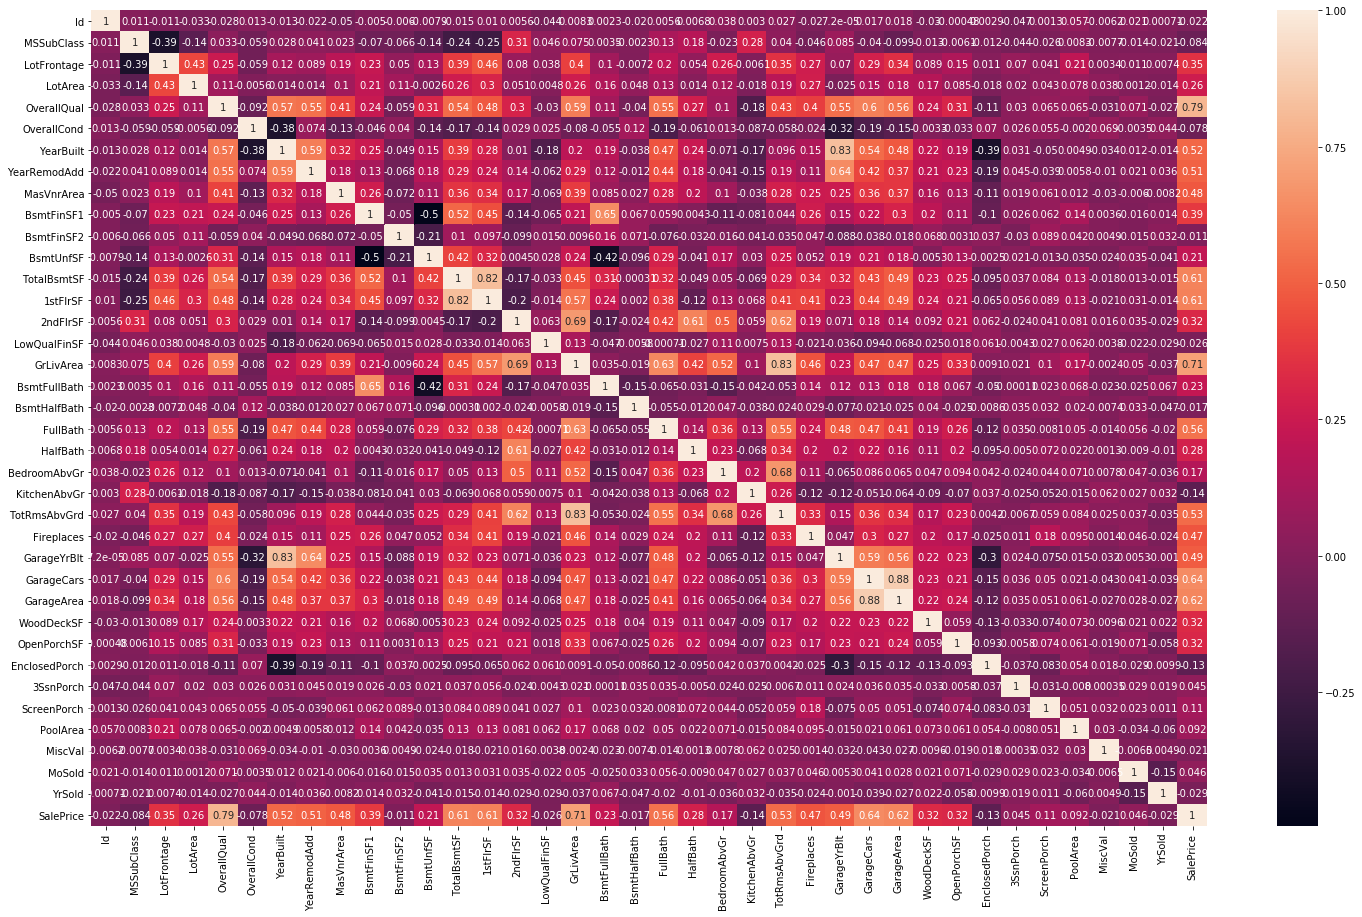

In [24]:
plt.figure(figsize=(25,15))
sns.heatmap(df.corr(),annot=True)
plt.show()



# regression for predicitng missing values in lotfrontage column

In [29]:
#seelcting the columns which has good correlation with 'lotfrontage'
df_mis=df[['Id','LotFrontage','SalePrice','PoolArea','GarageArea','GarageCars','Fireplaces','TotRmsAbvGrd','BedroomAbvGr','GrLivArea','1stFlrSF','TotalBsmtSF','OverallQual','LotArea','MSSubClass']]

In [30]:
df_mis.isnull().sum()

Id                0
LotFrontage     259
SalePrice         0
PoolArea          0
GarageArea        0
GarageCars        0
Fireplaces        0
TotRmsAbvGrd      0
BedroomAbvGr      0
GrLivArea         0
1stFlrSF          0
TotalBsmtSF       0
OverallQual       0
LotArea           0
MSSubClass        0
dtype: int64

In [31]:
df_mis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 15 columns):
Id              1460 non-null int64
LotFrontage     1201 non-null float64
SalePrice       1460 non-null int64
PoolArea        1460 non-null int64
GarageArea      1460 non-null int64
GarageCars      1460 non-null int64
Fireplaces      1460 non-null int64
TotRmsAbvGrd    1460 non-null int64
BedroomAbvGr    1460 non-null int64
GrLivArea       1460 non-null int64
1stFlrSF        1460 non-null int64
TotalBsmtSF     1460 non-null int64
OverallQual     1460 non-null int64
LotArea         1460 non-null int64
MSSubClass      1460 non-null int64
dtypes: float64(1), int64(14)
memory usage: 171.2 KB


In [34]:
df_miss=df_mis[df_mis['LotFrontage'].isnull()==True]
df_misn=df_mis[df_mis['LotFrontage'].isnull()==False]

In [35]:
df_miss.shape

(259, 15)

In [36]:
df_misn.shape

(1201, 15)

In [41]:
df_misn['BedroomAbvGr'].value_counts()

3    651
2    311
4    176
1     36
5     16
6      6
0      4
8      1
Name: BedroomAbvGr, dtype: int64

In [44]:
obj_cols=['GarageCars','TotRmsAbvGrd','BedroomAbvGr','OverallQual','MSSubClass']

In [45]:
train=pd.get_dummies(data=df_misn,columns=obj_cols,drop_first=True)
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1201 entries, 0 to 1459
Data columns (total 55 columns):
Id                 1201 non-null int64
LotFrontage        1201 non-null float64
SalePrice          1201 non-null int64
PoolArea           1201 non-null int64
GarageArea         1201 non-null int64
Fireplaces         1201 non-null int64
GrLivArea          1201 non-null int64
1stFlrSF           1201 non-null int64
TotalBsmtSF        1201 non-null int64
LotArea            1201 non-null int64
GarageCars_1       1201 non-null uint8
GarageCars_2       1201 non-null uint8
GarageCars_3       1201 non-null uint8
GarageCars_4       1201 non-null uint8
TotRmsAbvGrd_3     1201 non-null uint8
TotRmsAbvGrd_4     1201 non-null uint8
TotRmsAbvGrd_5     1201 non-null uint8
TotRmsAbvGrd_6     1201 non-null uint8
TotRmsAbvGrd_7     1201 non-null uint8
TotRmsAbvGrd_8     1201 non-null uint8
TotRmsAbvGrd_9     1201 non-null uint8
TotRmsAbvGrd_10    1201 non-null uint8
TotRmsAbvGrd_11    1201 non-null 

In [59]:
df_misn['TotRmsAbvGrd'].value_counts()

6     338
7     257
5     230
8     162
4      75
9      61
10     39
11     15
3      12
12     10
14      1
2       1
Name: TotRmsAbvGrd, dtype: int64

In [46]:
y=train['LotFrontage']
x=train.drop(columns=['LotFrontage'],axis=1)

from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
rf.fit(x,y)


C:\sajan\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [49]:
rf.score

<bound method RegressorMixin.score of RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)>

In [56]:
x.shape

(1201, 54)

##### predicting the missing value of LotFrontage

In [50]:
df_miss.isnull().sum()

Id                0
LotFrontage     259
SalePrice         0
PoolArea          0
GarageArea        0
GarageCars        0
Fireplaces        0
TotRmsAbvGrd      0
BedroomAbvGr      0
GrLivArea         0
1stFlrSF          0
TotalBsmtSF       0
OverallQual       0
LotArea           0
MSSubClass        0
dtype: int64

In [51]:
df_miss.shape

(259, 15)

In [55]:
df_misn.shape

(1201, 15)

In [52]:
test1=df_miss.drop(columns=['LotFrontage'],axis=1)

In [57]:
test1['TotRmsAbvGrd'].value_counts()

7     72
6     64
5     45
8     25
4     22
9     14
10     8
3      5
11     3
12     1
Name: TotRmsAbvGrd, dtype: int64

In [53]:
test=pd.get_dummies(data=test1,columns=obj_cols,drop_first=True)
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 259 entries, 7 to 1446
Data columns (total 48 columns):
Id                 259 non-null int64
SalePrice          259 non-null int64
PoolArea           259 non-null int64
GarageArea         259 non-null int64
Fireplaces         259 non-null int64
GrLivArea          259 non-null int64
1stFlrSF           259 non-null int64
TotalBsmtSF        259 non-null int64
LotArea            259 non-null int64
GarageCars_1       259 non-null uint8
GarageCars_2       259 non-null uint8
GarageCars_3       259 non-null uint8
GarageCars_4       259 non-null uint8
TotRmsAbvGrd_4     259 non-null uint8
TotRmsAbvGrd_5     259 non-null uint8
TotRmsAbvGrd_6     259 non-null uint8
TotRmsAbvGrd_7     259 non-null uint8
TotRmsAbvGrd_8     259 non-null uint8
TotRmsAbvGrd_9     259 non-null uint8
TotRmsAbvGrd_10    259 non-null uint8
TotRmsAbvGrd_11    259 non-null uint8
TotRmsAbvGrd_12    259 non-null uint8
BedroomAbvGr_1     259 non-null uint8
BedroomAbvGr_2     2

# ----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

# replacing miss values and also NA

In [60]:
columns_with_missing_values =df.columns[df.isnull().any()]       
df[columns_with_missing_values].isnull().sum()

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [3]:
df['LotFrontage']=df['LotFrontage'].fillna(df['LotFrontage'].mean())

In [19]:
df['Electrical']=df['Electrical'].fillna(df['Electrical'].mode())

In [10]:
df['Alley']=df['Alley'].replace({np.nan:'NotAva'})

In [15]:
df['MasVnrType']=df['MasVnrType'].fillna(df['MasVnrType'].mode())
df['MasVnrArea']=df['MasVnrArea'].fillna(df['MasVnrArea'].mean())


In [17]:
df['BsmtQual']=df['BsmtQual'].replace({np.nan:'no basement'})
df['BsmtCond']=df['BsmtCond'].replace({np.nan:'no basement'})
df['BsmtExposure']=df['BsmtExposure'].replace({np.nan:'no basement'})
df['BsmtFinType1']=df['BsmtFinType1'].replace({np.nan:'no basement'})
df['BsmtFinType2']=df['BsmtFinType2'].replace({np.nan:'no basement'})

In [20]:
df['FireplaceQu']=df['FireplaceQu'].replace({np.nan:'no fireplace'})

In [37]:
df['GarageYrBlt']=df['GarageYrBlt'].fillna(float(2005))

In [34]:
df['GarageYrBlt'].mode()

0    2005.0
dtype: float64

In [25]:
df['GarageType']=df['GarageType'].replace({np.nan:'no garage'})
df['GarageFinish']=df['GarageFinish'].replace({np.nan:'no garage'})
df['GarageQual']=df['GarageQual'].replace({np.nan:'no garage'})
df['GarageCond']=df['GarageCond'].replace({np.nan:'no garage'})

In [26]:
df['PoolQC']=df['PoolQC'].replace({np.nan:'no pool'})

In [28]:
df['Fence']=df['Fence'].replace({np.nan:'no fence'})

In [30]:
df['MiscFeature']=df['MiscFeature'].replace({np.nan:'nothing'})

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1460 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            1460 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non

In [44]:
cols=[]
for i in df.columns:
    print(i)
    print(df[i].nunique())
    print()
    if (df[i].dtype!='object' and df[i].nunique()<15) :
        cols.append(i)

Id
1460

MSSubClass
15

MSZoning
5

LotFrontage
111

LotArea
1073

Street
2

Alley
3

LotShape
4

LandContour
4

Utilities
2

LotConfig
5

LandSlope
3

Neighborhood
25

Condition1
9

Condition2
8

BldgType
5

HouseStyle
8

OverallQual
10

OverallCond
9

YearBuilt
112

YearRemodAdd
61

RoofStyle
6

RoofMatl
8

Exterior1st
15

Exterior2nd
16

MasVnrType
4

MasVnrArea
328

ExterQual
4

ExterCond
5

Foundation
6

BsmtQual
5

BsmtCond
5

BsmtExposure
5

BsmtFinType1
7

BsmtFinSF1
637

BsmtFinType2
7

BsmtFinSF2
144

BsmtUnfSF
780

TotalBsmtSF
721

Heating
6

HeatingQC
5

CentralAir
2

Electrical
5

1stFlrSF
753

2ndFlrSF
417

LowQualFinSF
24

GrLivArea
861

BsmtFullBath
4

BsmtHalfBath
3

FullBath
4

HalfBath
3

BedroomAbvGr
8

KitchenAbvGr
4

KitchenQual
4

TotRmsAbvGrd
12

Functional
7

Fireplaces
4

FireplaceQu
6

GarageType
7

GarageYrBlt
97

GarageFinish
4

GarageCars
5

GarageArea
441

GarageQual
6

GarageCond
6

PavedDrive
3

WoodDeckSF
274

OpenPorchSF
202

EnclosedPorch
120

3SsnPo

In [45]:
cols

['OverallQual',
 'OverallCond',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 'PoolArea',
 'MoSold',
 'YrSold']

## schecking significance of YrSold

In [50]:
df['YrSold'].value_counts()

2009    338
2007    329
2006    314
2008    304
2010    175
Name: YrSold, dtype: int64

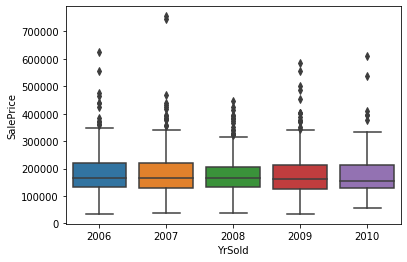

In [51]:
sns.boxplot(x='YrSold',y='SalePrice',data=df)
plt.show()

In [52]:
d2=df[df['YrSold']==2006]['SalePrice']
d3=df[df['YrSold']==2007]['SalePrice']
d4=df[df['YrSold']==2008]['SalePrice']
d5=df[df['YrSold']==2009]['SalePrice']
d6=df[df['YrSold']==2010]['SalePrice']

In [53]:
import scipy.stats as stats
stats.f_oneway(d2,d3,d4,d5,d6)

F_onewayResult(statistic=0.6455252211679311, pvalue=0.6300887663573457)

# checking significance of MoSold

In [54]:
df['MoSold'].value_counts()

6     253
7     234
5     204
4     141
8     122
3     106
10     89
11     79
9      63
12     59
1      58
2      52
Name: MoSold, dtype: int64

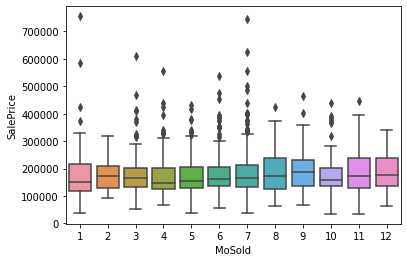

In [55]:
sns.boxplot(x='MoSold',y='SalePrice',data=df)
plt.show()

In [56]:
d2=df[df['MoSold']==1]['SalePrice']
d3=df[df['MoSold']==2]['SalePrice']
d4=df[df['MoSold']==3]['SalePrice']
d5=df[df['MoSold']==4]['SalePrice']
d6=df[df['MoSold']==5]['SalePrice']
d7=df[df['MoSold']==6]['SalePrice']
d8=df[df['MoSold']==7]['SalePrice']
d9=df[df['MoSold']==8]['SalePrice']
d10=df[df['MoSold']==9]['SalePrice']
d11=df[df['MoSold']==10]['SalePrice']
d12=df[df['MoSold']==11]['SalePrice']
d13=df[df['MoSold']==12]['SalePrice']
import scipy.stats as stats
stats.f_oneway(d2,d3,d4,d5,d6,d7,d8,d9,d10,d11,d12,d13)

F_onewayResult(statistic=0.9578652656318107, pvalue=0.48335232989243127)

In [82]:
df['OverallCond'].value_counts()

5    821
6    252
7    205
8     72
4     57
3     25
9     22
2      5
1      1
Name: OverallCond, dtype: int64

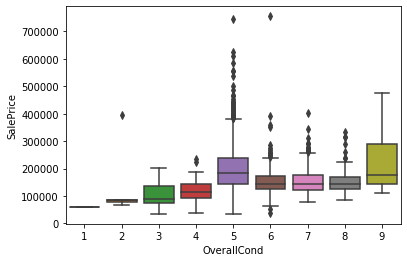

In [83]:
sns.boxplot(x='OverallCond',y='SalePrice',data=df)
plt.show()

In [77]:
d2=df[df['BsmtFullBath']==0]['SalePrice']
d3=df[df['BsmtFullBath']==1]['SalePrice']
d4=df[df['BsmtFullBath']==2]['SalePrice']
d5=df[df['BsmtFullBath']==3]['SalePrice']



stats.f_oneway(d2,d3,d4,d5)

F_onewayResult(statistic=27.448014806098907, pvalue=2.88243552729416e-17)

# changing datatypes now:
    

In [86]:
cols=cols[1:]

In [87]:
df[cols]=df[cols].astype('object')

In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1460 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            1460 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null object
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 no

# checking numerical columns now:
    

In [90]:
num_cols=df.select_dtypes(exclude='object').columns
num_cols

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'GarageYrBlt', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'MiscVal', 'SalePrice'],
      dtype='object')

#### columns to be converted

In [118]:
conv_cols=['MSSubClass','YearBuilt','YearRemodAdd','GarageYrBlt']
df[conv_cols]=df[conv_cols].astype('object')

In [120]:
cat_cols=df.select_dtypes(include='object').columns
cat_cols

Index(['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd',
       'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageQual', 'GarageCond',
       'PavedDrive', 'PoolArea', 'PoolQC', 'Fence', 'MiscFeature', 'MoSold',
       'YrSold', 'SaleType', 'SaleCondition'],
      dtype='object')

In [122]:
label_cols=[]
for i in cat_cols:
    if df[i].nunique()>10:
        label_cols.append(i)
print(label_cols)
    

['MSSubClass', 'Neighborhood', 'YearBuilt', 'YearRemodAdd', 'Exterior1st', 'Exterior2nd', 'TotRmsAbvGrd', 'GarageYrBlt', 'MoSold']


# label encoding the features having more number of unique values

In [129]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in label_cols:
    df[i]=le.fit_transform(df[i])

In [130]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int32
MSZoning         1460 non-null object
LotFrontage      1460 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            1460 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null int32
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null object
YearBuilt        1460 non-null int32
YearRemodAdd     1460 non-null int32
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non

# dropping insignificant features

In [131]:
df1=df.drop(columns=['YrSold','MoSold','PoolArea','BsmtHalfBath','3SsnPorch'])


In [135]:
df_final=pd.get_dummies(data=df1,drop_first=True)
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 231 entries, Id to SaleCondition_Partial
dtypes: float64(2), int32(8), int64(18), uint8(203)
memory usage: 563.3 KB


# Base model using random forrest

In [258]:
y=df_final['SalePrice']
x=df_final.drop(columns=['SalePrice','Id'],axis=1)


In [259]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.7)
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

C:\sajan\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.8204054878058881

In [154]:
FI=pd.DataFrame(rf.feature_importances_,index=list(x_train.columns))

In [156]:
fi=FI.reset_index()

In [158]:
fi.columns=['features','importance']
fi.head()

,features,importance
0,MSSubClass,0.000886
1,LotFrontage,0.010055
2,LotArea,0.021622
3,Neighborhood,0.003681
4,OverallQual,0.553212


# model improvement- sorting importance value in descending order

In [160]:
fi=fi.sort_values(by='importance',ascending=False)
fi_sorted=fi[fi['importance']>0]

In [161]:
fi_sorted.shape

(168, 2)

In [162]:
fi.shape

(229, 2)

In [166]:
y=df_final['SalePrice']
x=df_final[list(fi_sorted['features'])]

In [167]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.7)
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

C:\sajan\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.8044642850680442

# scoring using base model only

In [199]:
dfs=pd.read_csv('C:/Users/SAJAN P MENON/Desktop/week-9-case_study/house_price_kaggle/test.csv')

In [218]:
columns_with_missing_values =dfs.columns[dfs.isnull().any()]       
dfs[columns_with_missing_values].isnull().sum()

Series([], dtype: float64)

In [208]:
cl=['Utilities','MSZoning','Exterior1st','Exterior2nd','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','BsmtFullBath','BsmtHalfBath','KitchenQual','Functional','GarageCars','GarageArea','SaleType']

In [209]:
dfs[cl]=dfs[cl].fillna(method='ffill')

In [211]:
dfs['LotFrontage']=dfs['LotFrontage'].fillna(dfs['LotFrontage'].mean())

dfs['Electrical']=dfs['Electrical'].fillna(dfs['Electrical'].mode())

dfs['Alley']=dfs['Alley'].replace({np.nan:'NotAva'})


dfs['MasVnrType']=dfs['MasVnrType'].fillna(dfs['MasVnrType'].mode())
dfs['MasVnrArea']=dfs['MasVnrArea'].fillna(dfs['MasVnrArea'].mean())

dfs['BsmtQual']=dfs['BsmtQual'].replace({np.nan:'no basement'})
dfs['BsmtCond']=dfs['BsmtCond'].replace({np.nan:'no basement'})
dfs['BsmtExposure']=dfs['BsmtExposure'].replace({np.nan:'no basement'})
dfs['BsmtFinType1']=dfs['BsmtFinType1'].replace({np.nan:'no basement'})
dfs['BsmtFinType2']=dfs['BsmtFinType2'].replace({np.nan:'no basement'})

dfs['FireplaceQu']=dfs['FireplaceQu'].replace({np.nan:'no fireplace'})

dfs['GarageYrBlt']=dfs['GarageYrBlt'].fillna(float(2005))


dfs['GarageYrBlt'].mode()

dfs['GarageType']=dfs['GarageType'].replace({np.nan:'no garage'})
dfs['GarageFinish']=dfs['GarageFinish'].replace({np.nan:'no garage'})
dfs['GarageQual']=dfs['GarageQual'].replace({np.nan:'no garage'})
dfs['GarageCond']=dfs['GarageCond'].replace({np.nan:'no garage'})


dfs['PoolQC']=dfs['PoolQC'].replace({np.nan:'no pool'})

dfs['Fence']=dfs['Fence'].replace({np.nan:'no fence'})


dfs['MiscFeature']=dfs['MiscFeature'].replace({np.nan:'nothing'})

dfs['MasVnrType']=dfs['MasVnrType'].fillna('None')


In [221]:
cols=[]
for i in dfs.columns:
    print(i)
    print(dfs[i].nunique())
    print()
    if (dfs[i].dtype!='object' and dfs[i].nunique()<15) :
        cols.append(i)


Id
1459

MSSubClass
16

MSZoning
5

LotFrontage
116

LotArea
1106

Street
2

Alley
3

LotShape
4

LandContour
4

Utilities
1

LotConfig
5

LandSlope
3

Neighborhood
25

Condition1
9

Condition2
5

BldgType
5

HouseStyle
7

OverallQual
10

OverallCond
9

YearBuilt
106

YearRemodAdd
61

RoofStyle
6

RoofMatl
4

Exterior1st
13

Exterior2nd
15

MasVnrType
4

MasVnrArea
304

ExterQual
4

ExterCond
5

Foundation
6

BsmtQual
5

BsmtCond
5

BsmtExposure
5

BsmtFinType1
7

BsmtFinSF1
669

BsmtFinType2
7

BsmtFinSF2
161

BsmtUnfSF
793

TotalBsmtSF
736

Heating
4

HeatingQC
5

CentralAir
2

Electrical
4

1stFlrSF
789

2ndFlrSF
407

LowQualFinSF
15

GrLivArea
879

BsmtFullBath
4

BsmtHalfBath
3

FullBath
5

HalfBath
3

BedroomAbvGr
7

KitchenAbvGr
3

KitchenQual
4

TotRmsAbvGrd
12

Functional
7

Fireplaces
5

FireplaceQu
6

GarageType
7

GarageYrBlt
97

GarageFinish
4

GarageCars
6

GarageArea
459

GarageQual
5

GarageCond
6

PavedDrive
3

WoodDeckSF
263

OpenPorchSF
203

EnclosedPorch
131

3SsnPo

# Changinf datatypes now

In [223]:
cols=cols[1:]
dfs[cols]=dfs[cols].astype('object')

# checking numerical colums now

In [224]:
num_cols=dfs.select_dtypes(exclude='object').columns
num_cols

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'GarageYrBlt', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch', 'MiscVal'],
      dtype='object')

# columns to be converted

In [227]:
conv_cols=['MSSubClass','YearBuilt','YearRemodAdd','GarageYrBlt']
dfs[conv_cols]=dfs[conv_cols].astype('object')

In [228]:
cat_cols=dfs.select_dtypes(include='object').columns
cat_cols

Index(['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageQual', 'GarageCond',
       'PavedDrive', '3SsnPorch', 'PoolArea', 'PoolQC', 'Fence', 'MiscFeature',
       'MoSold', 'YrSold', 'SaleType', 'SaleCondition'],
      dtype='object')

In [230]:
label_cols=[]
for i in cat_cols:
    if dfs[i].nunique()>10:
        label_cols.append(i)
print(label_cols)

['MSSubClass', 'Neighborhood', 'YearBuilt', 'YearRemodAdd', 'Exterior1st', 'Exterior2nd', 'TotRmsAbvGrd', 'GarageYrBlt', '3SsnPorch', 'MoSold']


In [231]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in label_cols:
    dfs[i]=le.fit_transform(dfs[i])

In [232]:
dfs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
Id               1459 non-null int64
MSSubClass       1459 non-null int32
MSZoning         1459 non-null object
LotFrontage      1459 non-null float64
LotArea          1459 non-null int64
Street           1459 non-null object
Alley            1459 non-null object
LotShape         1459 non-null object
LandContour      1459 non-null object
Utilities        1459 non-null object
LotConfig        1459 non-null object
LandSlope        1459 non-null object
Neighborhood     1459 non-null int32
Condition1       1459 non-null object
Condition2       1459 non-null object
BldgType         1459 non-null object
HouseStyle       1459 non-null object
OverallQual      1459 non-null int64
OverallCond      1459 non-null int64
YearBuilt        1459 non-null int32
YearRemodAdd     1459 non-null int32
RoofStyle        1459 non-null object
RoofMatl         1459 non-null object
Exterior1st      1459 non-

In [235]:
dfs['Heating'].value_counts()

GasA    1446
GasW       9
Wall       2
Grav       2
Name: Heating, dtype: int64

In [236]:
dfs1=dfs.drop(columns=['YrSold','MoSold','PoolArea','BsmtHalfBath','3SsnPorch'])

In [289]:
dfs_final=pd.get_dummies(data=dfs1,drop_first=True)
dfs_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Columns: 209 entries, Id to SaleCondition_Partial
dtypes: float64(7), int32(8), int64(13), uint8(181)
memory usage: 531.5 KB


In [290]:
dfs_final=dfs_final.iloc[:,1:]
dfs_final.head()

,MSSubClass,LotFrontage,LotArea,Neighborhood,OverallQual,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,Exterior2nd,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,80.0,11622,12,5,6,56,11,10,12,...,0,0,0,0,1,0,0,0,1,0
1,0,81.0,14267,12,6,6,53,8,11,13,...,0,0,0,0,1,0,0,0,1,0
2,5,74.0,13830,8,5,5,92,48,10,12,...,0,0,0,0,1,0,0,0,1,0
3,5,78.0,9978,8,6,6,93,48,10,12,...,0,0,0,0,1,0,0,0,1,0
4,11,43.0,5005,22,8,5,87,42,6,6,...,0,0,0,0,1,0,0,0,1,0


In [291]:
dfs_final.shape

(1459, 208)

In [292]:
df_final.shape

(1460, 230)

In [293]:
for i in df_final.columns:
    if i not in dfs_final.columns:
        dfs_final[i]=0
for i in dfs_final.columns:
    if i not in df_final.columns:
        dfs_final.drop([i],axis=1,inplace=True)

In [294]:
dfs_final1=dfs_final.drop(columns=['SalePrice'],axis=1,inplace=True)

In [295]:
x.shape

(1460, 229)

In [300]:
dfs_final.shape

(1459, 229)

In [301]:
y_pred=rf.predict(dfs_final)

# improving the base model

In [335]:
y=df_final['SalePrice']
x=df_final.drop(columns=['SalePrice'],axis=1)


from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.7)
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

C:\sajan\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.8037189289651888

#### gradient boosting

In [336]:
from sklearn.ensemble import GradientBoostingRegressor
gboost=GradientBoostingRegressor()
gboost.fit(x_train,y_train)
print('r square value for train is',gboost.score(x_train,y_train))
print('r square value for test is',gboost.score(x_test,y_test))

r square value for train is 0.983804728689691
r square value for test is 0.8301735072253162


In [337]:
from sklearn.model_selection import cross_val_score
auc_val=[]
for val in range(1,100):
    gboost=GradientBoostingRegressor(n_estimators=val)
    result=cross_val_score(gboost,x,y,scoring='r2',cv=5)
    auc_val.append(np.mean(result))

In [338]:
print(np.argmax(auc_val))

91


In [339]:
gboost=GradientBoostingRegressor(n_estimators=91)
gboost.fit(x_train,y_train)
print('r square value for train is',gboost.score(x_train,y_train))
print('r square value for test is',gboost.score(x_test,y_test))

r square value for train is 0.9823246077166696
r square value for test is 0.8298947827471341


In [334]:
x_train.shape

(438, 168)

### predicting

In [322]:
for i in df_final.columns:
    if i not in dfs_final.columns:
        dfs_final[i]=0
for i in dfs_final.columns:
    if i not in df_final.columns:
        dfs_final.drop([i],axis=1,inplace=True)

In [327]:
dfs_final.shape

(1459, 229)

In [340]:
y_pred=gboost.predict(dfs_final)

# further improvement of gboost

In [343]:
FI=pd.DataFrame(gboost.feature_importances_,index=list(x_train.columns))
fi=FI.reset_index()
fi.columns=['features','importance']
fi=fi.sort_values(by='importance',ascending=False)
fi_sorted=fi[fi['importance']>0]

y=df_final['SalePrice']
x=df_final[list(fi_sorted['features'])]

In [344]:
gboost=GradientBoostingRegressor(n_estimators=91)
gboost.fit(x,y)
print('r square value for train is',gboost.score(x,y))


r square value for train is 0.9616796340303235


##### scoring

In [345]:
dfs_final.shape

(1459, 229)

In [346]:
x.shape

(1460, 93)

In [347]:
for i in x.columns:
    if i not in dfs_final.columns:
        dfs_final[i]=0
for i in dfs_final.columns:
    if i not in x.columns:
        dfs_final.drop([i],axis=1,inplace=True)

In [348]:
dfs_final.shape

(1459, 93)

In [349]:
y_pred=gboost.predict(dfs_final)

In [350]:
r1=dfs['Id']
r2=pd.DataFrame(y_pred,columns=['SalePrice'])
result=pd.concat([r1,r2],axis=1)
result.head()

,Id,SalePrice
0,1461,93982.499362
1,1462,112977.270063
2,1463,102677.643428
3,1464,97662.990695
4,1465,191930.945219


In [351]:
result.to_csv('C:/Users/SAJAN P MENON/Desktop/week-9-case_study/house_price_kaggle/upload_result2.csv')